In [1]:
import os
import time
import random
import pandas as pd
import numpy as np
import cv2
import torch
from tqdm.auto import tqdm
from PIL import Image
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('train_solution_bounding_boxes (1).csv')
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [5]:
# get image_id
df['image_id'] = df['image'].apply(lambda x: x.split('.')[0])
df['classes'] = 0
df.head(2)

,image,xmin,ymin,xmax,ymax,image_id,classes
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547,vid_4_1000,0
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180,vid_4_10000,0


In [7]:
# Define image configuration
IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS = 380, 676, 3  # Using uppercase for constants by convention

# Define the path to the images folder
IMAGES_FOLDER = 'data/training_images/'  # Also using uppercase as a convention for constants

# Print configuration for confirmation
print(f"Image dimensions: {IMG_HEIGHT}x{IMG_WIDTH}, Channels: {NUM_CHANNELS}")
print(f"Images folder: {IMAGES_FOLDER}")


Image dimensions: 380x676, Channels: 3
Images folder: data/training_images/


In [9]:
# Define image dimensions
img_w, img_h = 676, 380  # Set image width and height based on your specific requirements

# Convert bounding box data to YOLO format
df['x_center'] = ((df['xmin'] + df['xmax']) / 2) / img_w  # Normalize x_center
df['y_center'] = ((df['ymin'] + df['ymax']) / 2) / img_h  # Normalize y_center
df['w'] = (df['xmax'] - df['xmin']) / img_w               # Normalize width
df['h'] = (df['ymax'] - df['ymin']) / img_h               # Normalize height

# Display the first few rows to confirm the conversion
df[['x_center', 'y_center', 'w', 'h']].head()


,x_center,y_center,w,h
0,0.450434,0.539817,0.068741,0.095238
1,0.100217,0.557191,0.155572,0.129987
2,0.444645,0.543678,0.181621,0.157014
3,0.833213,0.531451,0.197540,0.155727
4,0.110347,0.559122,0.171491,0.136422


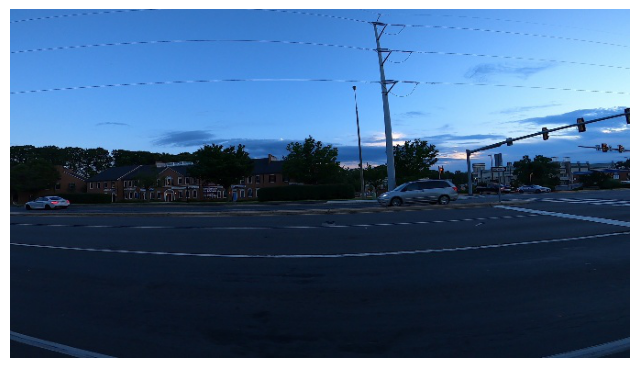

In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the folder containing the images
images_folder = 'Downloads/data/training_images/'  # Replace with the actual path if different

# Randomly select an image from the 'image' column in the DataFrame
image = random.choice(df['image'])

# Construct the full path to the image
image_path = os.path.join(images_folder, image)

# Check if the file exists before trying to open it
if os.path.exists(image_path):
    # Open and display the image
    img = Image.open(image_path)
    plt.figure(figsize=(8, 6))  # Set figure size if needed
    plt.axis('off')
    plt.imshow(img)
    plt.show()
else:
    print(f"Image {image} not found in folder {images_folder}.")


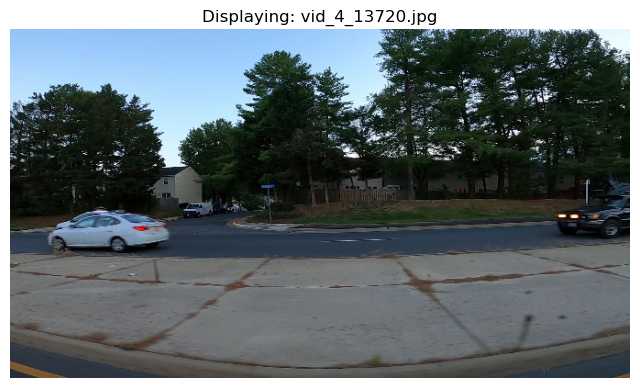

In [13]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the images folder path
images_folder = 'Downloads/data/training_images/' # Update the path if necessary

# Check if the 'image' column exists and has data
if 'image' in df.columns and not df['image'].empty:
    # Randomly select an image from the 'image' column in the DataFrame
    image = random.choice(df['image'])
    
    # Construct the full path to the image
    image_path = os.path.join(images_folder, image)
    
    # Attempt to open and display the image
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(8, 6))  # Optional: Set figure size
        plt.axis('off')
        plt.title(f"Displaying: {image}")
        plt.imshow(img)
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image '{image}' not found in folder '{images_folder}'.")
    except Exception as e:
        print(f"An error occurred while opening the image: {e}")
else:
    print("The DataFrame does not contain an 'image' column or it's empty.")


In [15]:
import os
import cv2
import matplotlib.pyplot as plt

# Folder path where images are stored
images_folder = 'Downloads/data/training_images/'  # Update the path if necessary

def draw_bounding_box(idx):
    # Check if the index is valid
    if idx >= len(df) or idx < 0:
        print(f"Index {idx} is out of bounds.")
        return

    # Construct the path to the image file
    image_path = os.path.join(images_folder, df['image'][idx])
    
    # Attempt to read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image at index {idx} not found or could not be opened.")
        return

    # Get bounding box coordinates
    x_min = int(df['xmin'][idx])
    y_min = int(df['ymin'][idx])
    x_max = int(df['xmax'][idx])
    y_max = int(df['ymax'][idx])

    # Draw the bounding box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Place the label above the bounding box
    cv2.putText(image, 'car', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Convert image from BGR to RGB for correct color display in Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.title(f"Bounding Box for Image Index {idx}")
    plt.imshow(image_rgb)
    plt.show()


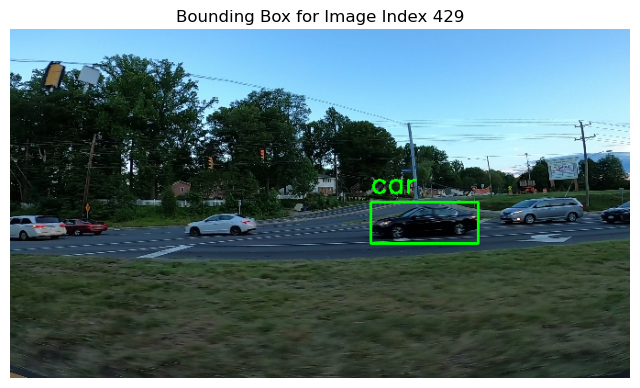

In [17]:
import random

# Check if the DataFrame has any rows
if not df.empty:
    # Generate a random index within the bounds of the DataFrame
    idx = random.randint(0, len(df) - 1)
    
    # Call the function to draw the bounding box
    draw_bounding_box(idx)
else:
    print("The DataFrame is empty. Please check your data.")
